# **Personal Information**

**Name:** Thomas Sijpkens

**StudentID:** 

**Email:** t.d.t.sijpkens@student.vu.nl

**Github:** https://github.com/Th0github/TSP-Instance-Hardness

**Submitted on:** N.D

In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.animation import FuncAnimation
from PIL import Image

In [3]:
# set current directory to the directory of this script
__file__ = "/home/ohnoyes/Documents/Master Project/TSP-Instance-Hardness/Replication-plots.ipynb"
os.chdir(os.path.dirname(os.path.abspath(__file__)))
print("Current directory: ", os.getcwd())

Current directory:  /home/ohnoyes/Documents/Master Project/TSP-Instance-Hardness


In [4]:
def custom_decoder(obj):
    """
    Custom decoder function that converts specific JSON values back to their original types.
    Converts:
    - 'Infinity' to np.inf
    """
    if isinstance(obj, dict):
        for key, value in obj.items():
            if value == "Infinity":
                obj[key] = np.inf
            # elif isinstance(value, list):
                # Convert lists back to arrays
                # obj[key] = np.array(value)
            elif isinstance(value, dict):
                obj[key] = custom_decoder(value)
    elif isinstance(obj, list):
        for i, value in enumerate(obj):
            if value == "Infinity":
                obj[i] = np.inf
            # elif isinstance(value, list):
                # obj[i] = np.array(value)
            elif isinstance(value, dict):
                obj[i] = custom_decoder(value)
    return obj


def load_result(file_path):

  # Loading the JSON file with custom decoding
  with open(file_path, "r") as json_file:
      loaded_results = json.load(json_file, object_hook=custom_decoder)

  return loaded_results

In [5]:
def find_hardest_matrix2(loaded):
    # Find the maximum hardness value
    max_hardness = list(loaded[-1][1].values())[-1][1]
    
    # Initialize the hardest matrix
    hardest_matrix = None
    
    # Traverse through the data in reverse order
    for i in range(len(loaded) - 1, -1, -1):
        values_list = list(loaded[i][1].values())
        for j in range(len(values_list) - 1, -1, -1):
            # Check if the current hardness is equal to the maximum hardness
            if values_list[j][0] == max_hardness:
                # Assign the hardest matrix value
                hardest_matrix = values_list[j][4]
                return max_hardness, hardest_matrix
    
    return max_hardness, hardest_matrix

In [6]:
# Define the parameters
cities = [10,15,20]
ranges = [20]
results_path = 'Results/uniform-atsp/'

# Initialize a dictionary to store the counts
count_runs = {city: {range_val: 0 for range_val in ranges} for city in cities}

# Get a list of all run directories
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

# Count the runs for each city and range
for run in runs:
    for city in cities:
        for range_val in ranges:
            # Construct the base path for checking files
            base_path = os.path.join(results_path, run, f'results{city}_{range_val}.json')
            
            # Check if the base file exists
            if os.path.exists(base_path):
                count_runs[city][range_val] += 1

lowest = 100
# Print the results
for city in cities:
    for range_val in ranges:
        current = count_runs[city][range_val]
        if current < lowest:
            lowest = current
        print(f"City: {city}, randMax: {range_val}, Count: {count_runs[city][range_val]}")
print("Lowest:",lowest)


City: 10, randMax: 20, Count: 0
City: 15, randMax: 20, Count: 0
City: 20, randMax: 20, Count: 0
Lowest: 0


In [ ]:
# Wouter's way of loading the data
# super_dict = {}
# hardest_dict = {}

# for i in cities:
#   path = f"Results/uniform-atsp/results{i}_20.json"
#   loaded = load_result(path)
#   #super_dict[i] = loaded
#   #hardest = find_hardest_matrix2(loaded)

In [62]:
#dict = json.loads(open("Results/hardest.json").read())
my_super_dict = {}

cities = [10,15,20]
ranges = [20,30]

for i in cities:
    for j in ranges:
        path = f"Results/uniform-atsp/results{i}_{j}.json"
        load = json.loads(open(path).read())
        my_super_dict[f"{i}_{j}"] = load

In [71]:
print(my_super_dict.keys())


print(my_super_dict["10_30"][0].keys())


print(my_super_dict["10_30"][0]['configurations'].keys())
# print(my_super_dict["10_30"]['configurations']['1'].keys())
# print(my_super_dict["10_30"]['configurations']['1']['iterations'])
# print(my_super_dict["10_30"]['configurations']['1']['hardest'])
# print(my_super_dict["10_30"]['configurations']['mutation_type'])
# print(len(my_super_dict["10_30"]['configurations']))

dict_keys(['10_20', '10_30', '15_20', '15_30', '20_20', '20_30'])
dict_keys(['time', 'configurations'])
dict_keys(['city_size', 'range', 'mutation_type', 'generation_type', 'distribution', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'])


# Plotting Uniform ATSP for cities = [10,15,20] and randmax = [20,30]


In [ ]:
print(len(my_super_dict[10]['configurations']))


# y_iterations = []
# y_hardness = []
# x = range(1, len(super_dict[10]['configurations'])-4) # -5 to remove the configurations in the beginning
# for i in range(len(super_dict[10]['configurations'])-5):
#     y_iterations.append(super_dict[10]['configurations'][str(i)]['iterations'])
#     y_hardness.append(super_dict[10]['configurations'][str(i)]['hardest'])

# plt.plot(x, y_iterations, label="iterations")
# plt.plot(x, y_hardness, label="Hardness Found")
# set_title = "City = 10, rand_max = 20, mutation_type = inplace"
# plt.title(set_title)
# plt.xlabel("Mutations")
# plt.ylabel("Lital's Iterations")

# Uniform ATSP for Cities of size [10, 15, 20] and randmax = [20,30]

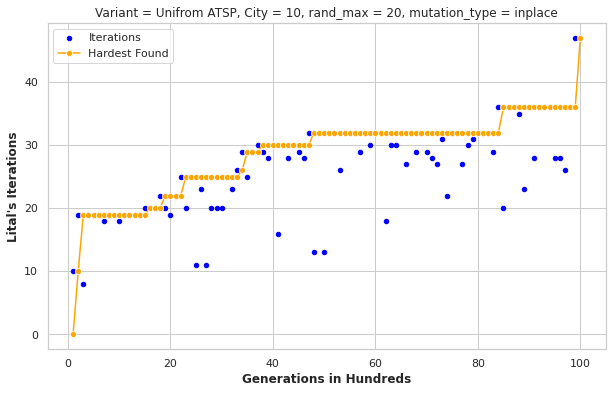

In [47]:
y_iterations = []
y_hardness = []
x = range(1, len(my_super_dict["10_20"]['configurations'])-4) # -5 to remove the configurations in the beginning
for i in range(len(my_super_dict["10_20"]['configurations'])-5):
    y_iterations.append(my_super_dict["10_20"]['configurations'][str(i)]['iterations'])
    y_hardness.append(my_super_dict["10_20"]['configurations'][str(i)]['hardest'])

# Create DataFrame for sns
plot_data = pd.DataFrame({
    'Mutations': x,
    'Iterations': y_iterations,
    'Hardest Found': y_hardness
})

# Plot using Seaborn
# sns.set(style="whitegrid")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))


# Plot iterations as scatter only (no line)
plt.scatter(plot_data['Mutations'], plot_data['Iterations'], color='blue', label='Iterations', s=20)

# Plot hardest found as line plot
sns.lineplot(data=plot_data, x='Mutations', y='Hardest Found', label='Hardest Found', marker='o', color='orange')

# Setting title and labels
plt.title("Variant = Unifrom ATSP, City = 10, rand_max = 20, mutation_type = inplace")
plt.xlabel("Generations in Hundreds", size=12, fontweight='bold')
plt.ylabel("Lital's Iterations", size=12, fontweight='bold')
plt.legend()
os.makedirs("Results/uniform-atsp/plots", exist_ok=True)
plt.savefig("Results/uniform-atsp/plots/10_20_inplace.png")
plt.show()

In [61]:
cities = [10, 15, 20]
ranges = [30]

# Loop through multiple pairs
for city in cities:
    for rand_max in ranges:
        key = f"{city}_{rand_max}"
        if key in my_super_dict:
            # Extract data
            print("extracting data from", key)
            y_iterations = []
            y_hardness = []
            x = range(1, len(my_super_dict[key]['configurations']) - 4)  # Adjust range
            for i in range(len(my_super_dict[key]['configurations']) - 5):
                y_iterations.append(my_super_dict[key]['configurations'][i]['iterations'])
                y_hardness.append(my_super_dict[key]['configurations'][i]['hardest'])

            # Create DataFrame for sns
            plot_data = pd.DataFrame({
                'Mutations': x,
                'Iterations': y_iterations,
                'Hardest Found': y_hardness
            })

            # Plot using Seaborn
            sns.set(style="whitegrid")
            plt.figure(figsize=(10, 6))

            # Plot iterations as scatter only (no line)
            plt.scatter(plot_data['Mutations'], plot_data['Iterations'], color='blue', label='Iterations', s=20)

            # Plot hardest found as line plot
            sns.lineplot(data=plot_data, x='Mutations', y='Hardest Found', label='Hardest Found', marker='.', color='orange')

            # Setting title and labels
            plt.title(f"Uniform ATSP w/ City = {city}, rand_max = {rand_max}, mutation_type = inplace")
            plt.xlabel("Mutations", fontweight='bold')
            plt.ylabel("Lital's Iterations", size=12, fontweight='bold')
            plt.legend()

            # Create directory if it doesn't exist
            os.makedirs('Results/uniform-atsp/plots', exist_ok=True)
            plt.savefig(f'Results/plots/uniform_atsp_{key}_inplace.png')
            #plt.show()

extracting data from 10_30


KeyError: 0

In [ ]:
cities = [10,15,20]
ranges = [20, 30]

results_path_uniform_tsp = 'Results/uniform_tsp/'
# Load each result file
for i in cities:
    for j in ranges:
        path = f"{results_path_uniform_tsp}results{i}_{j}.json"
        loaded = load_result(path)
        current_dict = loaded

    y_iterations = []
    y_hardness = []
    x = range(1, len(current_dict[10]['configurations'])-4) # -5 to remove the configurations in the beginning
    for i in range(len(current_dict[10]['configurations'])-5):
        y_iterations.append(current_dict[10]['configurations'][str(i)]['iterations'])
        y_hardness.append(current_dict[10]['configurations'][str(i)]['hardest'])

    plt.plot(x, y_iterations, label="iterations")
    plt.plot(x, y_hardness, label="Hardness Found")
    set_title = "City = 10, rand_max = 20, mutation_type = inplace"
    plt.title(set_title)
    plt.xlabel("Mutations")
    plt.ylabel("Lital's Iterations" , size=12)
    plt.savefig(f"Results/uniform_tsp/Plots/{i}_{j}.png")

In [90]:
with open('results5_20.json', 'r') as file:
    data = json.load(file)

# Access entries with "iterations" and "hardest"
for key, value in enumerate(data):
    if isinstance(value, dict):
        iterations = value.get('iterations')
        hardest = value.get('hardest')
        print(f"Entry {index}: iterations = {iterations}, hardest = {hardest}")

dumbass


In [67]:
super_dict_data = super_dict[10]
print(f"Data for city {city} from super_dict:", super_dict_data)

print(f"Shape of the data: {len(super_dict_data)}")

# Extract 
#iterations = [data[0] for data in super_dict_data[0][1].values()]
print(f"Lital's iteration values: {iterations}")

#hardest = [data[1] for data in super_dict_data[0][2].values()]
#print(f"Lital's hardness values: {hardest}")

#hardness = [data[1] for data in super_dict_data[10]]
print(f"Hardness values: {hardest}")


KeyError: 10

In [31]:
# Example: Accessing data from super_dict and hardest_dict
print("Hello World")
# Accessing data for a specific city from super_dict
city = 25
super_dict_data = super_dict[city]
print(f"Data for city {city} from super_dict:", super_dict_data)

# Accessing the hardest matrix and its hardness value from hardest_dict
hardest_data = hardest_dict[city]
hardness_value, hardest_matrix = hardest_data
print(f"Hardness value for city {city} from hardest_dict:", hardness_value)
print(f"Hardest matrix for city {city} from hardest_dict:", hardest_matrix)

print("keys:",super_dict.keys())

print("values:",super_dict[10].values())

for city_idx, (city_range, city_results) in enumerate(uberdict.items()):
    for result_idx, (result_range, data) in enumerate(city_results.items()):
        print(f"City {city_idx}, result {result_idx}, data: {data}")
        print(f"City {city_idx}, result {result_idx}, data: {data['data']}")
        print(f"City {city_idx}, result {result_idx}, data: {data['hardness']}")



Data for city 25 from super_dict: [[586.4420998096466, {'0': [1516, 0, [[6, 9], [13, 5], [12, 13], [18, 3], [20, 12], [15, 20], [1, 21], [2, 10], [21, 17], [9, 22], [4, 1], [17, 15], [23, 14], [5, 0], [19, 11], [24, 6], [11, 7], [8, 24], [0, 23], [7, 2], [14, 19], [22, 18], [10, 16], [3, 4], [16, 8]], 35.0360818857589, [[inf, 15.887138308564188, 6.299593598928961, 3.850343869421453, 14.050914709857166, 5.827319655312458, 17.67744697449236, 8.55713230603914, 18.517278242198554, 7.887539907418359, 19.385852865876473, 12.933077934283563, 13.993602247426093, 11.140899597276118, 4.032585864652882, 19.198266848566654, 15.77210062771889, 18.364586667075276, 14.98447097124094, 10.568871932370758, 9.066990430866237, 13.451158580130935, 10.63371878121953, 0.2916253850994366, 2.0882217043467444], [6.902135616966514, inf, 7.820019701418128, 16.89526077937095, 12.921353574406012, 17.247449177924686, 3.094769031807767, 17.082982593250577, 16.240383522752573, 17.978522968914163, 13.181299475941586, 1

In [39]:
cities = [10, 15, 20, 25, 30]
ranges = [20]

results_path = 'Results/'
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

data_to_save = {}

for city in cities:
    data_to_save[city] = {}
    for range_val in ranges:
        max_x_values = []
        run_data = []
        conv_list = []
        k = 0

        for run in runs:
            if k > lowest:
                break
            base_path = f"Results/{run}/results{city}_{range_val}"
            if not os.path.exists(base_path + '.json'):
                continue
            k += 1
            file_paths = [base_path + '.json']
            # Automatically add files that are extensions of the main file
            part_num = 0
            while os.path.exists(base_path + f'_{part_num}.json'):
                file_paths.append(base_path + f'_{part_num}.json')
                part_num += 1

            combined_x_values = []
            combined_y_values = []

            for path in file_paths:
                try:
                    loaded = load_result(path)
                except:
                    continue

                for hundred_gens in loaded:
                    current_x_values = list(hundred_gens[1].keys())
                    current_y_values_1 = [values[1] for values in hundred_gens[1].values()]

                    combined_x_values.extend(current_x_values)
                    combined_y_values.extend(current_y_values_1)

            if len(combined_x_values) > len(max_x_values):
                max_x_values = combined_x_values
            run_data.append((combined_x_values, combined_y_values))
            if combined_y_values:
                conv_list.append(len(combined_y_values))

        data_to_save[city][range_val] = {
            "run_data": run_data,
            "conv_list": conv_list,
            "max_x_values": max_x_values
        }

with open('superraam.json', 'w') as f:
    json.dump(data_to_save, f)

In [ ]:
# Plot lognormal distribution
def lognormal(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

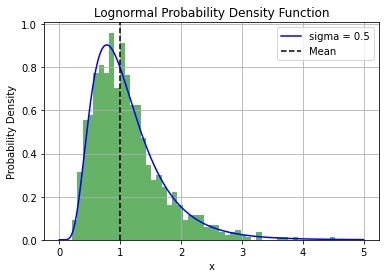

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters for the lognormal distribution
mean = 0
sigma = 0.5

# Generate x values
x = np.linspace(0, 5, 1000)
x_hist = np.random.lognormal(mean, sigma, 1000)


# Calculate the lognormal PDF
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mean))
#cdf = lognorm.cdf(x, s=sigma, scale=np.exp(mean))

# Plot the lognormal distribution
plt.plot(x, pdf, label='sigma = 0.5', color='blue')
plt.hist(x_hist, bins=50, density=True, alpha=0.6, color='green')
#plt.plot(x, cdf, label='Lognormal CDF', color='red')
plt.axvline(np.exp(mean), color='black', linestyle='--', label='Mean')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Lognormal Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'lognormal' is not defined

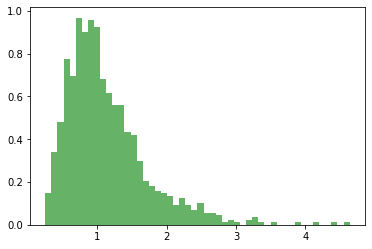

In [121]:

plt.hist(x, bins=50, density=True, alpha=0.6, color='g')
plt.plot
plt.show()

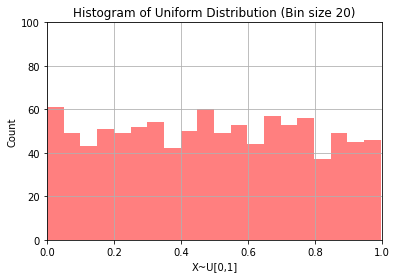

In [120]:
data = np.random.uniform(0,1,1000) # You are generating 1000 points between 0 and 1.
count, bins, ignored = plt.hist(data, 20, facecolor='red', alpha=0.5) # 20 bins

plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Histogram of Uniform Distribution (Bin size 20)")
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)